In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = load_model("AutoencoderModel.h5")

In [3]:
new_image = tf.keras.preprocessing.image.load_img("autoencoderDataseet/generated_noise_data/1.jpg", target_size=(320, 320))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
prediction = model.predict(new_image)

ValueError: in user code:

    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\usman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 320, 320, 3]


In [4]:
noise_data = []
SIZE = 320
image = cv2.imread("autoencoderDataseet/generated_noise_data/1.jpg", 0)
image = cv2.resize(image, (320, 320))
noise_data.append(image)
noisy_train = np.reshape(noise_data, (len(noise_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255
no_noise_image = model.predict(noisy_train)

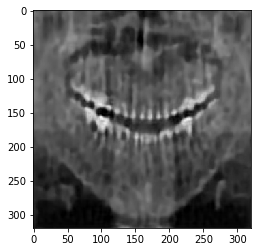

In [5]:
plt.imshow(no_noise_image[0].reshape(SIZE, SIZE), cmap="gray")
plt.show()

In [8]:
cv2.imwrite("NewImage.jpg", no_noise_image[0].reshape(SIZE, SIZE)*255)

True